In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
d0 = pd.read_csv("train.csv")

In [4]:
l = d0['label']

In [5]:
d= d0.drop('label', axis =1)

In [6]:
d.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
d.shape

(42000, 784)

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
#standarrizing data coolumns standaraization 
#afther stadarzied , we would have mean of adata 0 and variance 1
#l = labels
#d = data

In [10]:
from sklearn.preprocessing import StandardScaler
standarized_data = StandardScaler().fit_transform(d)
print(standarized_data.shape)

(42000, 784)


In [11]:
standarized_data.shape

(42000, 784)

In [12]:
from sklearn.preprocessing import StandardScaler
standarized_data = StandardScaler().fit_transform(d)
print(standarized_data.shape)
sample_data = standarized_data
covar_matrix = np.matmul(sample_data.T, sample_data)
print("The shape of covarainc ematrix is ", covar_matrix.shape)

(42000, 784)
The shape of covarainc ematrix is  (784, 784)


In [12]:
#finding the top two eigne vlaues and eigen vectors
#for projecting onto 2d space

from scipy.linalg import eigh

# the parameter inside eigh , "eigvals" is defined in ascending order 
# we will genereate only the top two eigen values i.e. (782, 783) 

values , vectors = eigh(covar_matrix, eigvals=
                        (782,783))

print('shape of eigen vectors', vectors.shape)
vectors = vectors.T
print("Updated shape is ", vectors.shape)

shape of eigen vectors (784, 2)
Updated shape is  (2, 784)


In [13]:
new_coordinates = np.matmul(vectors, sample_data.T)

In [14]:
new_coordinates = np.matmul(vectors, sample_data.T)
new_coordinates.shape

(2, 42000)

In [15]:
#appending the label

new_coordinates = np.matmul(vectors, sample_data.T)
new_coordinates.shape
#appending the label
new_coordinates = np.vstack((new_coordinates, l)).T
#creating dataframe for plotting 
#dataframe = pd.DataFrame(data=new_cosordinates, columns=("1st_principle", "2nd_principal"))

In [13]:
dataframe = pd.DataFrame(data=new_coordinates, 
                         columns=("1st_principle", 
                                  "2nd_principal",
                                  "label"))

NameError: name 'new_coordinates' is not defined

In [17]:
dataframe.head()

,1st_principle,2nd_principal,label
0,-5.226445,-5.140478,1.0
1,6.032996,19.292332,0.0
2,-1.705813,-7.644503,1.0
3,5.836139,-0.474207,4.0
4,6.024818,26.559574,0.0


In [18]:
dataframe = pd.DataFrame(data=new_coordinates, 
                         columns=("1st_principle", 
                                  "2nd_principal",
                                  "label"))

/home/prajin/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


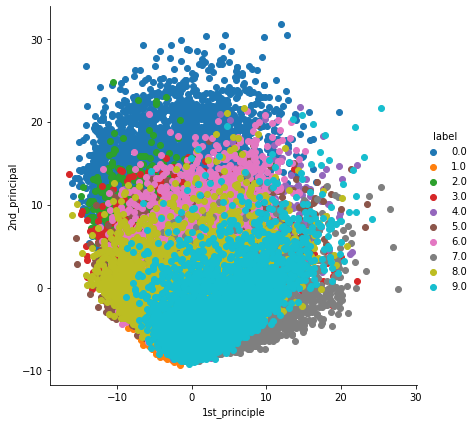

In [19]:
sns.FacetGrid(dataframe, hue = 'label',
              size =6)
            .map(plt.scatter,'1st_principle', 
             '2nd_principal').add_legend()

# PCA USING SCIKIT LEARN

In [20]:
from sklearn import decomposition
pca = decomposition.PCA()

In [21]:
pca.n_components =2 
pca_data = pca.fit_transform(sample_data)

print("shape of pca_reduced.shape = " , pca_data.shape)

shape of pca_reduced.shape =  (42000, 2)


In [22]:
#now attaching the labels
pca_data = np.vstack((pca_data.T, l)).T
pca_df = pd.DataFrame(pca_data, columns=("1st_principle", "2nd_principal", "label"))

/home/prajin/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


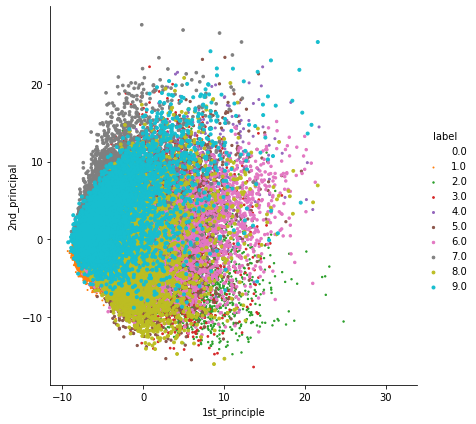

In [23]:
sns.FacetGrid(pca_df, hue = 'label',  size = 6).map(plt.scatter, '1st_principle', '2nd_principal', 'label').add_legend()

In [24]:
#so now you want to use pca for dimensionality reduction 
# first of all you need to decide how much to go from 784 to 10 or to 20 or56 or what ? 
# that is explained by eigen values , such as lamba1 / (sum of all lamdas)

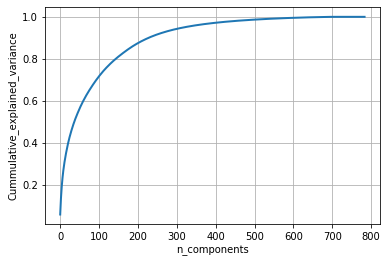

In [25]:
pca.n_components = 784
pca_data = pca.fit_transform(sample_data)
percentage_var_explained= pca.explained_variance_ / np.sum(pca.explained_variance_)
cum_var_explained = np.cumsum(percentage_var_explained)

#plotting the pca spectrum

plt.figure(1, figsize=(6,4))
plt.plot(cum_var_explained, linewidth =2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cummulative_explained_variance')
plt.show()

# T-sne ON mNIST 

In [26]:
from sklearn.manifold import TSNE

In [27]:
standarized_data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [28]:
standarized_data.shape

(42000, 784)

In [29]:
l.shape

(42000,)

In [30]:
#calculating for 100 points at firs 

/home/prajin/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


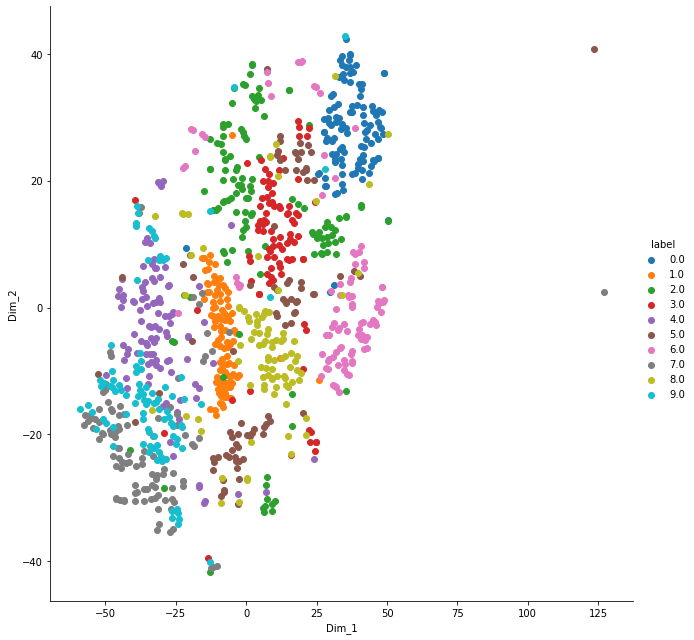

In [31]:

data_1000 = standarized_data[:1000,:]
label_1000 = l[0:1000]

model = TSNE(n_components=2, random_state=0)
#configuring the parameters 
# number of components =2 
# default prelximity =30
# default learning rate = 200
# default number of iterations = 1000

tsne_data = model.fit_transform(data_1000)


#creating new data frame wheihc helps in plotting 

tsne_data = np.vstack((tsne_data.T, label_1000)).T
tsne_df = pd.DataFrame(data= tsne_data,columns=("Dim_1", "Dim_2", "label"))

#plotting the rsult 

sns.FacetGrid(tsne_df, hue="label", size =9).map(plt.scatter ,'Dim_1', 'Dim_2').add_legend()
plt.show()

In [ ]:
model = TSNE(n_components=2, random_state=0, perplexity=50)
# number of components =2 
# default prelximity =30
# default learning rate = 200
# default number of iterations = 1000

tsne_data = model.fit_transform(data_1000)


#creating new data frame wheihc helps in plotting 

tsne_data = np.vstack((tsne_data.T, label_1000)).T
tsne_df = pd.DataFrame(data= tsne_data,columns=("Dim_1", "Dim_2", "label"))

#plotting the rsult 

sns.FacetGrid(tsne_df, hue="label", size =9).map(plt.scatter ,'Dim_1', 'Dim_2').add_legend()
plt.show()

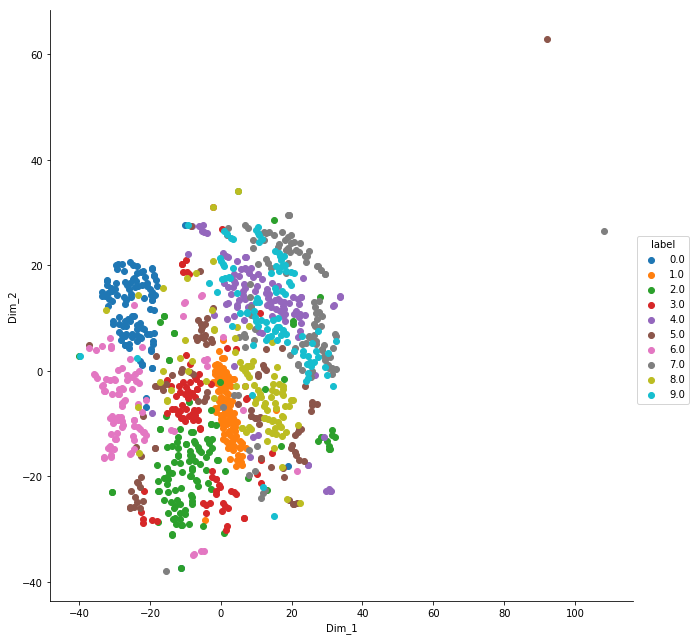

In [32]:
model = TSNE(n_components=2, random_state=0, perplexity=50, n_iter=1000)
#configuring the parameters 
# number of components =2 
# default prelximity =30
# default learning rate = 200
# default number of iterations = 1000

tsne_data = model.fit_transform(data_1000)


#creating new data frame wheihc helps in plotting 

tsne_data = np.vstack((tsne_data.T, label_1000)).T
tsne_df = pd.DataFrame(data= tsne_data,columns=("Dim_1", "Dim_2", "label"))

#plotting the rsult 

sns.FacetGrid(tsne_df, hue="label", size =9).map(plt.scatter ,'Dim_1', 'Dim_2').add_legend()
plt.show()

In [ ]:

data_42000 = standarized_data[:42000,:]
label_42000 = l[0:42000]

model = TSNE(n_components=2, random_state=0, perplexity=50, n_iter=5000)


tsne_data = model.fit_transform(data_42000)


#creating new data frame wheihc helps in plotting 

tsne_data = np.vstack((tsne_data.T, label_42000)).T
tsne_df = pd.DataFrame(data= tsne_data,columns=("Dim_1", "Dim_2", "label"))

#plotting the rsult 

sns.FacetGrid(tsne_df, hue="label", size =9).map(plt.scatter ,'Dim_1', 'Dim_2').add_legend()
plt.show()